# Chapter 11 - Exercises

### Exercise 11.1

**Q**

Convert the equation of n-step off-policy TD (7.9) to semi-gradient form. Give accompanying definitions of the return for both the episodic and continuing cases.

**A**

Equation 7.9 is:

$$
V_{t+n}(S_t) \doteq V_{t+n-1}(S_t) + \alpha \rho_{t:t+n-1} [G_{t:t+n} - V_{t+n-1}(S_t)], \quad 0 \leq t \lt T
$$

The equivalent semi-gradient form is:

$$
\textbf{w}_{t+n} \doteq \textbf{w}_{t+n-1} + \alpha \rho_{t:t+n-1} [G_{t:t+n} - \widehat{v}(S_t, \textbf{w}_{t+n-1})] \nabla \widehat{v}(S_t, \textbf{w}_{t+n-1}), \quad 0 \leq t \lt T
$$

The definitions of the return for both the episodic and continuing cases are:

$$
G_{t:t+n}(S_t) \doteq R_{t+1} + ... + \gamma^{n-1} R_{t+n} + \gamma^n \widehat{v}(S_{t+n}, \textbf{w}_{t+n-1}) = \left[ \sum_{i=0}^{n-1} \gamma^i R_{t+i+1} \right] + \gamma^n \widehat{v}(S_{t+n}, \textbf{w}_{t+n-1}) \tag{episodic}
$$

$$
G_{t:t+n}(S_t) \doteq R_{t+1} - \overline{R}_t + ... + R_{t+n} - \overline{R}_{t+n-1} + \widehat{v}(S_{t+n}, \textbf{w}_{t+n-1}) = \left[ \sum_{i=0}^{n-1} (R_{t+i+1} - \overline{R}_{t+i}) \right] + \widehat{v}(S_{t+n}, \textbf{w}_{t+n-1}) \tag{continuing}
$$

with $G_{t:t+n} = G_t$ if $t + n \geq T$.

### Exercise 11.2 

**Q**

Convert the equations of n-step Q($\sigma$) (7.11 and 7.17) to semi-gradient form. Give definitions that cover both the episodic and continuing cases.

**A**

Equation 7.11 is:

$$
Q_{t+n}(S_t, A_t) \doteq Q_{t+n-1}(S_t, A_t) + \alpha \rho_{t+1:t+n}[G_{t:t+n} - Q_{t+n-1}(S_t, A_t)] \tag{7.11}
$$

Equation 7.17 is:

$$
G_{t:h} \doteq R_{t+1} + \gamma(\sigma_{t+1} \rho_{t+1} + (1 - \sigma_{t+1}) \pi(A_{t+1} | S_{t+1})) (G_{t+1:h} - Q_{h-1}(S_{t+1}, A_{t+1})) + \gamma \overline{V}_{h-1} (S_{t+1}) \tag{7.17}
$$

The n-step Q($\sigma$) update in semi-gradient form is:

$$
\textbf{w}_{t+n} \doteq \textbf{w}_{t+n-1} + \alpha \rho_{t+1:t+n}[G_{t:t+n} - \widehat{q}(S_t, A_t, \textbf{w}_{t+n-1})] \nabla \widehat{q}(S_t, A_t, \textbf{w}_{t+n-1})
$$

With, for $h = t + n$:

$$
G_{t:t+n} = G_{t:h} \doteq R_{t+1} + \gamma(\sigma_{t+1} \rho_{t+1} + (1 - \sigma_{t+1}) \pi(A_{t+1} | S_{t+1})) (G_{t+1:h} - \widehat{q}(S_{t+1}, A_{t+1}, \textbf{w}_{h-1})) + \gamma \overline{v} (S_{t+1}, \textbf{w}_{h-1}) \tag{episodic}
$$

$$
G_{t:t+n} = G_{t:h} \doteq R_{t+1} - \overline{R}_t + (\sigma_{t+1} \rho_{t+1} + (1 - \sigma_{t+1}) \pi(A_{t+1} | S_{t+1})) (G_{t+1:h} - \widehat{q}(S_{t+1}, A_{t+1}, \textbf{w}_{h-1})) + \overline{v} (S_{t+1}, \textbf{w}_{h-1}) \tag{continuing}
$$

with:

$$
\overline{v}(s, \textbf{w}) = \sum_{a \in \mathcal{A}(s)} \pi(a | s) \widehat{q}(s, a, \textbf{w})
$$

for $t \lt h \leq T$, with $G_{h:h} = \widehat{q}(S_h, A_h, \textbf{w}_{h-1})$ if $h \lt T$ or, if $h = T$, with $G_{T-1:T} = R_T$ for the episodic case and $G_{T-1:T} = R_T - \overline{R}_{T-1}$ for the continuing case.


### Example 11.1

\begin{align*}
\frac{d[(w - \gamma 2 w_k)^2 + (2w - (1 - \epsilon) \gamma 2 w_k)^2]}{dw} &= 0 \\
2(w - \gamma 2 w_k) \cdot 1 + 2(2w - (1 - \epsilon) \gamma 2 w_k) \cdot 2 &= 0\\
2w - 4 \gamma w_k + 8w - 8 \gamma w_k + 8 \epsilon \gamma w_k &= 0 \\
10w - 12 \gamma w_k + 8 \epsilon \gamma w_k &= 0 \\
10w &= 12 \gamma w_k - 8 \epsilon \gamma w_k \\
w &= \frac{12 \gamma w_k - 8 \epsilon \gamma w_k}{10} \\
w &= \frac{6 - 4 \epsilon}{5} \gamma w_k
\end{align*}

### Exercise 11.3 (programming) 

**Q**

Apply one-step semi-gradient Q-learning to Baird’s counterexample and show empirically that its weights diverge.

**A**

In [237]:
from numpy.random import MT19937, Generator

def random_generator(seed: int | None = None):
    bg = MT19937(seed)
    rg = Generator(bg)
    return rg

In [238]:
X = [
    [2, 0, 0, 0, 0, 0, 0, 1],
    [0, 2, 0, 0, 0, 0, 0, 1],
    [0, 0, 2, 0, 0, 0, 0, 1],
    [0, 0, 0, 2, 0, 0, 0, 1],
    [0, 0, 0, 0, 2, 0, 0, 1],
    [0, 0, 0, 0, 0, 2, 0, 1],
    [0, 0, 0, 0, 0, 0, 1, 2],
]

NUM_STATES = len(X)
NUM_ACTIONS = 2
SOLID = 0
DASHED = 1

pi = [1, 0]
b = [1/7, 6/7]

gamma = 0.99
alpha = 0.01

initial_w: list[float] = [1, 1, 1, 1, 1, 1, 10, 1]

def apply_step(state: int, action: int, rg: Generator) -> tuple[int, float]:
    next_state = (NUM_STATES - 1) if action == SOLID else rg.choice(NUM_STATES - 1)
    return next_state, 0

def p_fn(state: int, action: int) -> list[tuple[float, int, float]]:
    if action == SOLID:
        return [(1, NUM_STATES-1, 0)]
    else:
        return [(1/(NUM_STATES-1), ns, 0) for ns in range(NUM_STATES-1)]

def value(state: int, weights: list[int]):
    x = X[state]
    v = sum([xi * wi for xi, wi in zip(x, weights)])
    return v

def q_value(state: int, action: int, weights: list[int]):
    q = 0
    ps = p_fn(state, action)
    for prob, next_state, r in ps:
        qi = r + gamma * value(next_state, weights)
        q += prob * qi
    return q

In [239]:
def semi_grad_td(steps: int, seed: int | None):
    step = 0
    w = initial_w
    ws = [w]
    rg = random_generator(seed)
    s = rg.integers(NUM_STATES)
    while step < steps:
        step += 1
        a = rg.choice(len(b), p=b)
        ns, r = apply_step(s, a, rg)
        val = value(s, w)
        next_val = value(ns, w)
        delta = r + gamma * next_val - val
        rho = pi[a] / b[a]
        grad = X[s]
        w = [wi for wi in w]
        for i in range(len(w)):
            w[i] += alpha * rho * delta * grad[i]
        ws.append(w)
        s = ns
    return ws

In [240]:
def semi_grad_dp(sweeps: int):
    sweep = 0
    w = initial_w
    ws = [w]
    while sweep < sweeps:
        sweep += 1
        w_diff = [0] * len(w)
        for s in range(NUM_STATES):
            val = value(s, w)
            grad = X[s]
            w_diff_s = 0
            for a, p_a in enumerate(pi):
                ps = p_fn(s, a)
                for p_ns, ns, r in ps:
                    next_val = value(ns, w)
                    w_diff_s += p_a * p_ns * (r + gamma * next_val - val)
            for i in range(len(w)):
                w_diff[i] += w_diff_s * grad[i]
        w = [wi for wi in w]
        for i in range(len(w)):
            w[i] += (alpha/NUM_STATES) * w_diff[i]
        ws.append(w)
    return ws

In [241]:
def semi_grad_dp_on_policy_dist(sweeps: int, seed: int | None):
    sweep = 0
    w = initial_w
    ws = [w]
    rg = random_generator(seed)
    s = rg.integers(NUM_STATES)
    while sweep < sweeps:
        sweep += 1
        val = value(s, w)
        grad = X[s]
        next_val = 0
        for a, p_a in enumerate(b):
            ps = p_fn(s, a)
            for p_ns, ns, r in ps:
                next_val_i = value(ns, w)
                next_val += p_a * p_ns * next_val_i
        delta = r + gamma * next_val - val
        w = [wi for wi in w]
        for i in range(len(w)):
            w[i] += alpha * delta * grad[i]
        ws.append(w)
        # follow on-policy distribution
        a = rg.choice(len(b), p=b)
        ns, r = apply_step(s, a, rg)
        s = ns
    return ws

In [242]:
def semi_grad_td_sarsa(steps: int, seed: int | None):
    step = 0
    w = initial_w
    ws = [w]
    rg = random_generator(seed)
    s = rg.integers(NUM_STATES)
    a = rg.choice(len(b), p=b)
    while step < steps:
        step += 1
        val = q_value(s, a, w)
        ns, r = apply_step(s, a, rg)
        na = rg.choice(len(b), p=b)
        next_val = q_value(s, na, w)
        delta = r + gamma * next_val - val
        rho = pi[na] / b[na]
        grad = X[s]
        w = [wi for wi in w]
        for i in range(len(w)):
            w[i] += alpha * rho * delta * grad[i]
        ws.append(w)
        s = ns
        a = na
    return ws

In [243]:
# Q-learning won't used the target policy pi specified above,
# it will update the values according to the optimal policy
# (greed wrt the action values)
def semi_grad_td_q(steps: int, seed: int | None):
    step = 0
    w = initial_w
    ws = [w]
    rg = random_generator(seed)
    s = rg.integers(NUM_STATES)
    while step < steps:
        step += 1
        a = rg.choice(len(b), p=b)
        val = q_value(s, a, w)
        next_val = max([q_value(s, ai, w) for ai in range(NUM_ACTIONS)])
        ns, r = apply_step(s, a, rg)
        delta = r + gamma * next_val - val
        grad = X[s]
        w = [wi for wi in w]
        for i in range(len(w)):
            w[i] += alpha * delta * grad[i]
        ws.append(w)
        s = ns
    return ws

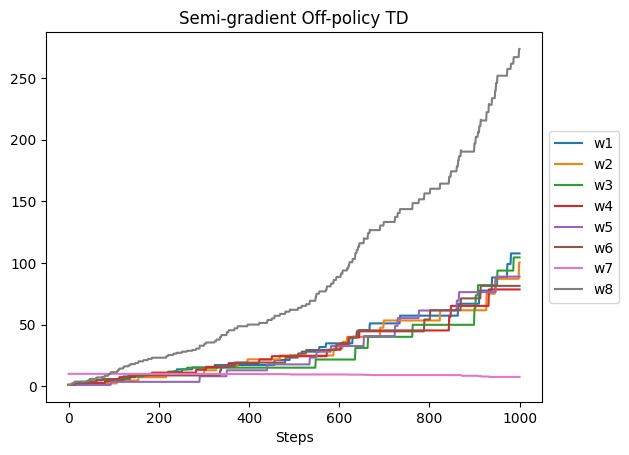

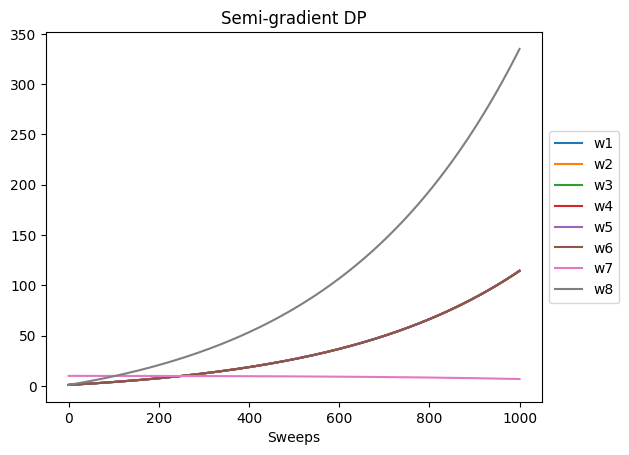

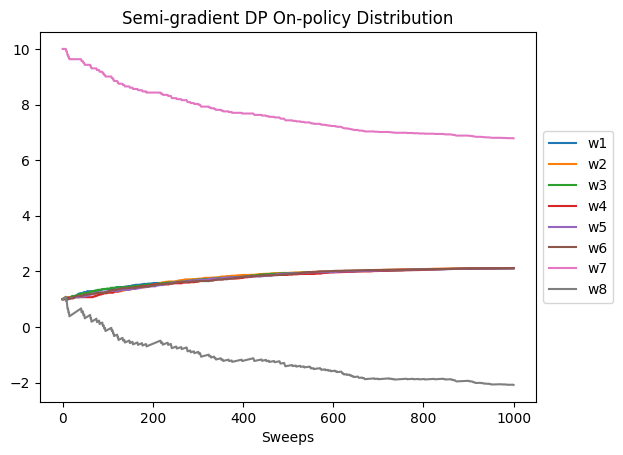

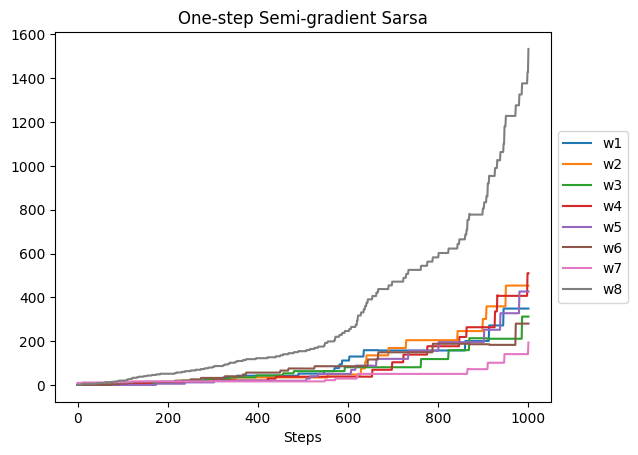

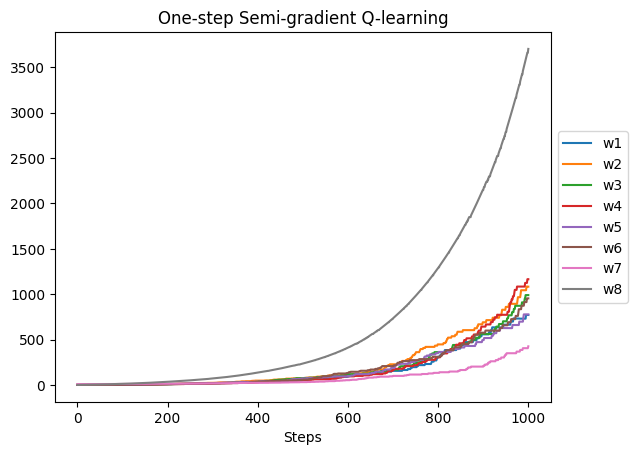

In [244]:
import typing
import matplotlib.pyplot as plt

iterations = 1000
seed = 1
cases: list[tuple[str, str, typing.Callable[[], list[list[float]]]]] = [
    ('Semi-gradient Off-policy TD', 'Steps', lambda: semi_grad_td(steps=iterations, seed=seed)),
    ('Semi-gradient DP', 'Sweeps', lambda: semi_grad_dp(sweeps=iterations)),
    # correct w must be a multiple of (1, 1, 1, 1, 1, 1, 4, -2)
    ('Semi-gradient DP On-policy Distribution', 'Sweeps', lambda: semi_grad_dp_on_policy_dist(sweeps=iterations, seed=seed)),
    ('One-step Semi-gradient Sarsa', 'Steps', lambda: semi_grad_td_sarsa(steps=iterations, seed=seed)),
    ('One-step Semi-gradient Q-learning', 'Steps', lambda: semi_grad_td_q(steps=iterations, seed=seed)),
]

for name, xlabel, fn in cases:
    ws = fn()
    plt.figure()
    wis = list(zip(*ws))
    for i, wi in enumerate(wis):
        plt.plot(wi, label=f'w{i+1}')
    plt.title(name)
    plt.xlabel(xlabel)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Exercise 11.4

**Q**

Prove (11.24). Hint: Write the $\overline{RE}$ as an expectation over possible states $s$ of the expectation of the squared error given that $S_t = s$. Then add and subtract the true value of state $s$ from the error (before squaring), grouping the subtracted true value with the return and the added true value with the estimated value. Then, if you expand the square, the most complex term will end up being zero, leaving you with (11.24). 

**A**

Equation 11.24 is:

$$
\overline{RE}(\textbf{w}) = \mathbb{E}[(G_t - \widehat{v}(S_t, \textbf{w}))^2] = \overline{VE} + \mathbb{E}[(G_t - v_{\pi}(S_t))^2]
$$

$\overline{VE}$ is defined, according to 9.1, as:

$$
\overline{VE} \doteq \sum_{s \in \mathcal{S}} \mu(s) [v_{\pi}(s) - \widehat{v}(s, \textbf{w})]^2
$$

Also, by definition:

$$
v_{\pi}(s) \doteq \mathbb{E}_{\pi}[G_t | S_t=s]
$$

For any given $s \in \mathcal{S}$, $\mathbb{E}[v_{\pi}(s) | S_t=s] = v_{\pi}(s)$ and $\mathbb{E}[\widehat{v}(s, \textbf{w}) | S_t=s] = \widehat{v}(s, \textbf{w})$. That is, for a given state $s$, their values can be considered constant and the expectation is the value itself.

Then:

\begin{align*}
\overline{RE}(\textbf{w}) &= \mathbb{E}[(G_t - \widehat{v}(S_t, \textbf{w}))^2] \\
&= \sum_{s \in \mathcal{S}} \mu(s) \mathbb{E}[(G_t - \widehat{v}(s, \textbf{w}))^2 | S_t=s] \\
&= \sum_{s \in \mathcal{S}} \mu(s) \mathbb{E}[(G_t - \widehat{v}(s, \textbf{w}) + v_{\pi}(s) - v_{\pi}(s))^2 | S_t=s] \\
&= \sum_{s \in \mathcal{S}} \mu(s) \mathbb{E}[((G_t - v_{\pi}(s)) + (v_{\pi}(s) - \widehat{v}(s, \textbf{w})))^2 | S_t=s] \\
&= \sum_{s \in \mathcal{S}} \mu(s) \mathbb{E}[(G_t - v_{\pi}(s))^2 + 2(G_t - v_{\pi}(s))(v_{\pi}(s) - \widehat{v}(s, \textbf{w})) + (v_{\pi}(s) - \widehat{v}(s, \textbf{w}))^2 | S_t=s] \\
&= \sum_{s \in \mathcal{S}} \mu(s) \mathbb{E}[(v_{\pi}(s) - \widehat{v}(s, \textbf{w}))^2 | S_t=s] + \sum_{s \in \mathcal{S}} \mu(s) \mathbb{E}[(G_t - v_{\pi}(s))^2 | S_t=s] + \sum_{s \in \mathcal{S}} \mu(s) \mathbb{E}[2(G_t - v_{\pi}(s))(v_{\pi}(s) - \widehat{v}(s, \textbf{w})) | S_t=s] \\
&= \sum_{s \in \mathcal{S}} \mu(s) [v_{\pi}(s) - \widehat{v}(s, \textbf{w})]^2 + \mathbb{E}[(G_t - v_{\pi}(S_t))^2] + 2 \sum_{s \in \mathcal{S}} \mu(s) \mathbb{E}[G_t v_{\pi}(s) - G_t \widehat{v}(s, \textbf{w}) - v_{\pi}^2(s) + v_{\pi}(s) \widehat{v}(s, \textbf{w}) | S_t=s] \\
&= \overline{VE} + \mathbb{E}[(G_t - v_{\pi}(S_t))^2] + 2 \sum_{s \in \mathcal{S}} \mu(s) \mathbb{E}[G_t v_{\pi}(s) - G_t \widehat{v}(s, \textbf{w}) - v_{\pi}^2(s) + v_{\pi}(s) \widehat{v}(s, \textbf{w}) | S_t=s] \\
&= \overline{VE} + \mathbb{E}[(G_t - v_{\pi}(S_t))^2] + 2 \sum_{s \in \mathcal{S}} \mu(s) \left[ \mathbb{E}[G_t v_{\pi}(s) | S_t=s] - \mathbb{E}[G_t \widehat{v}(s, \textbf{w}) | S_t=s] - \mathbb{E}[v_{\pi}^2(s) | S_t=s] + \mathbb{E}[v_{\pi}(s) \widehat{v}(s, \textbf{w}) | S_t=s] \right] \\
&= \overline{VE} + \mathbb{E}[(G_t - v_{\pi}(S_t))^2] + 2 \sum_{s \in \mathcal{S}} \mu(s) \left[ v_{\pi}(s) \mathbb{E}[G_t | S_t=s] - \widehat{v}(s, \textbf{w}) \mathbb{E}[G_t | S_t=s] - v_{\pi}^2(s) + v_{\pi}(s) \widehat{v}(s, \textbf{w}) \right] \\
&= \overline{VE} + \mathbb{E}[(G_t - v_{\pi}(S_t))^2] + 2 \sum_{s \in \mathcal{S}} \mu(s) \left[ v_{\pi}^2(s) - \widehat{v}(s, \textbf{w}) v_{\pi}(s) - v_{\pi}^2(s) + v_{\pi}(s) \widehat{v}(s, \textbf{w}) \right] \\
&= \overline{VE} + \mathbb{E}[(G_t - v_{\pi}(S_t))^2] + 2 \sum_{s \in \mathcal{S}} \mu(s) \cdot 0 \\
&= \overline{VE} + \mathbb{E}[(G_t - v_{\pi}(S_t))^2]
\end{align*}